# 【問題1】train_test_splitのスクラッチ
スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます。以下の雛形をベースとして関数を完成させてください。



In [120]:
%matplotlib inline
import numpy as np
import random
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import warnings
import sys

warnings.simplefilter("ignore")

In [101]:
def scratch_train_test_split(X, y, train_size=0.8,):
    """
    検証データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    #ここにコードを書く
    if X.shape[0] != y.shape[0]:
        print('Error: configuration failed', file=sys.stderr)
        sys.exit("配列のサイズが一致しません")
    else:
        square_size = X.shape[0]*X.shape[1]
        x_index_size = int(X.shape[0]*train_size)
        y_index_size = int(y.shape[0]*train_size)
        list_order = np.random.choice(np.arange(X.shape[0]),size = (X.shape[0],),replace = False)
        #重複を許さずランダムに値を格納し、訓練用・検証用に分割
        x_random_list = X[list_order,:]#np.random.choice(X.reshape(square_size,),size = (X.shape[0],X.shape[1]),replace = False)  
        y_random_list = y[list_order]#np.random.choice(y.flatten(),size = (y.shape[0],),replace = False)
        X_train,X_test = x_random_list[:x_index_size,:],x_random_list[x_index_size:,:]
        y_train,y_test = y_random_list[:y_index_size],y_random_list[y_index_size:]
        return X_train, X_test, y_train, y_test

In [102]:
X = np.arange(100).reshape(10,10)
y = np.arange(100,110)
x_train,x_test,y_train,y_test = scratch_train_test_split(X,y,train_size=0.5)
#print(x_train,x_test,y_train,y_test,sep = "\n\n")

# 【問題2】 分類問題を解くコードの作成
分類は3種類の手法をスクラッチします。


・ロジスティック回帰  
・SVM  
・決定木

上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。

In [103]:
#irisデータセット
iris = load_iris()
X1 = pd.DataFrame(iris.data[50:],columns = ["sepal_length","sepal_width","petal_length","petal_width"])
y1 = pd.DataFrame(iris.target[50:],columns  = ["Species"])
#df1 = pd.concat([X,y],axis=1)

In [142]:
#シンプルデータセット１
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X2 = np.concatenate((f0, f1))
y2 = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X2 = X2[random_index]
y2 = y2[random_index]

In [143]:
#シンプルデータセット２
X3 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y3 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

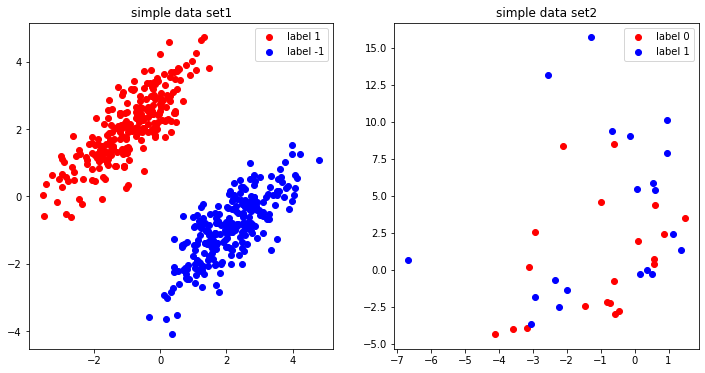

In [164]:
#シンプルデータセット1,2の可視化
X2_ones = X2[y2==1]
X2_minus = X2[y2 != 1]
X3_zeros = X3[y3==0]
X3_ones = X3[y3==1]

fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].set(title="simple data set1")
ax[0].scatter(X2_ones[:,0],X2_ones[:,1],color="r",label = "label 1")
ax[0].scatter(X2_minus[:,0],X2_minus[:,1],color="b",label = "label -1")
ax[0].legend()

ax[1].set(title="simple data set2")
ax[1].scatter(X3_zeros[:,0],X3_zeros[:,1],color = "r",label = "label 0")
ax[1].scatter(X3_ones[:,0],X3_ones[:,1],color = "b",label = "label 1")
ax[1].legend()
plt.show()

見て分かる通り、データセット１はラベルごとにデータの分布が綺麗に別れているが、データセット２はデータの分布がバラバラで規則性がないためラベルを予測するのは困難である。

In [165]:
#訓練データ、テストデータを渡すと３つの方法で分類を行い、それぞれの推定データを返す関数
def three_clf(X_train,X_test,y_train,y_test):
    scaler_x = StandardScaler()
    scaler_x.fit(X_train)
    X_train = scaler_x.transform(X_train)
    X_test = scaler_x.transform(X_test)
    log_clf = SGDClassifier(loss="log").fit(X_train,y_train)
    svc = SVC().fit(X_train,y_train)
    dtc = DecisionTreeClassifier().fit(X_train,y_train)
    return log_clf.predict(X_test),svc.predict(X_test),dtc.predict(X_test)
    
#推定データ、テストデータを渡すと指標値を返す関数
def evaluate(arr,test_arr):
    return accuracy_score(test_arr,arr),precision_score(test_arr,arr),recall_score(test_arr,arr),f1_score(test_arr,arr)

・irisデータセット

In [166]:
#自作関数で訓練データ、テストデータに分割
x_train,x_test,y_train,y_test = scratch_train_test_split(np.array(X1),np.array(y1))
#分類
y_pred1 = three_clf(x_train,x_test,y_train,y_test)
#表示
list = ["SGDClassifier","SVC","DecisionTreeClassifier"]
data1 = np.empty((4,3))

for i,clf in enumerate(list):
    data1[:,i] = np.array(evaluate(y_pred1[i],y_test))
    if i == 2:
        df1 = pd.DataFrame(data1,index=["Accuracy","Precision","Recall","F値"],columns=list)

display(df1)

,SGDClassifier,SVC,DecisionTreeClassifier
Accuracy,0.950000,0.950000,0.950000
Precision,1.000000,1.000000,1.000000
Recall,0.900000,0.900000,0.900000
F値,0.947368,0.947368,0.947368


・シンプルデータセット1

In [167]:
#自作関数で訓練データ、テストデータに分割
x_train,x_test,y_train,y_test = scratch_train_test_split(np.array(X2),np.array(y2))
#分類
y_pred2 = three_clf(x_train,x_test,y_train,y_test)
#表示
data2 = np.empty((4,3))
for i,clf in enumerate(list):
    data2[:,i] = np.array(evaluate(y_pred2[i],y_test))
    if i == 2:
        df2 = pd.DataFrame(data2,index=["Accuracy","Precision","Recall","F値"],columns=list)

display(df2)

,SGDClassifier,SVC,DecisionTreeClassifier
Accuracy,1.0,1.0,1.0
Precision,1.0,1.0,1.0
Recall,1.0,1.0,1.0
F値,1.0,1.0,1.0


・シンプルデータセット2

In [168]:
#自作関数で訓練データ、テストデータに分割
x_train,x_test,y_train,y_test = scratch_train_test_split(np.array(X3),np.array(y3))
#分類
y_pred3 = three_clf(x_train,x_test,y_train,y_test)
#表示
data3 = np.empty((4,3))
for i,clf in enumerate(list):
    data3[:,i] = np.array(evaluate(y_pred3[i],y_test))
    if i == 2:
        df3 = pd.DataFrame(data3,index=["Accuracy","Precision","Recall","F値"],columns=list)

display(df3)

,SGDClassifier,SVC,DecisionTreeClassifier
Accuracy,0.75,0.500000,0.625000
Precision,0.00,0.250000,0.333333
Recall,0.00,0.500000,0.500000
F値,0.00,0.333333,0.400000


In [169]:
print("irisデータセット")
display(df1)
print("シンプルデータセット１")
display(df2)
print("シンプルデータセット２")
display(df3)

irisデータセット


,SGDClassifier,SVC,DecisionTreeClassifier
Accuracy,0.950000,0.950000,0.950000
Precision,1.000000,1.000000,1.000000
Recall,0.900000,0.900000,0.900000
F値,0.947368,0.947368,0.947368


シンプルデータセット１


,SGDClassifier,SVC,DecisionTreeClassifier
Accuracy,1.0,1.0,1.0
Precision,1.0,1.0,1.0
Recall,1.0,1.0,1.0
F値,1.0,1.0,1.0


シンプルデータセット２


,SGDClassifier,SVC,DecisionTreeClassifier
Accuracy,0.75,0.500000,0.625000
Precision,0.00,0.250000,0.333333
Recall,0.00,0.500000,0.500000
F値,0.00,0.333333,0.400000


# 【問題3】 回帰問題を解くコードの作成
線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。

データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。

In [170]:
data = pd.read_csv("train.csv")
label = ["GrLivArea","YearBuilt","SalePrice"]
df = data.loc[:,label]
display(df.head())

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [173]:
#線形回帰を関数化
def predict_prices(x_train,x_test,y_train,y_test):
    reg = SGDRegressor()
    reg.fit(x_train,y_train)
    return reg.predict(x_test)

#推定データ、テストデータを渡すと指標値をprintする関数
def print_values2(arr_pred,y_test_):
        print("R2 (決定係数)：{}\n平均二乗誤差：{}\n平均絶対誤差：{}".format(*evaluate2(arr_pred,y_test_)))
    
#推定データ、テストデータを渡すと指標値を返す関数
def evaluate2(arr,test_arr):
    return r2_score(test_arr, arr),mean_squared_error(test_arr, arr),mean_absolute_error(test_arr, arr)


In [174]:
#訓練データ、検証データに分割
x_train,x_test,y_train,y_test = scratch_train_test_split(np.array(df.iloc[:,:2]),np.array(df.SalePrice),train_size = 0.8)
scaler_x = StandardScaler()
scaler_y = StandardScaler()
#標準化
scaler_x.fit(x_train)
scaler_y.fit(y_train[:,np.newaxis])
x_train,x_test = scaler_x.transform(x_train),scaler_x.transform(x_test)
y_train,y_test = scaler_y.transform(y_train[:,np.newaxis]).flatten(),scaler_y.transform(y_test[:,np.newaxis]).flatten()

y_pred = predict_prices(x_train,x_test,y_train,y_test)
print_values2(y_pred,y_test)

R2 (決定係数)：0.644279235800229
平均二乗誤差：0.27431895800952555
平均絶対誤差：0.37693686683744854
